# Objective
The aim of this project is to develop a regression model capable of accurately predicting solar power generation based on various environmental and meteorological features. The ultimate goal is to capture the relationship between solar energy output and influencing weather conditions, enabling better forecasting and energy planning for solar power systems.

###**Column Details:**
- **distance_to_solar_noon**: in radians.

- **temperature**: daily average temperature, in degrees Celsius.

- **wind_direction**: daily average wind direction, in degrees (0–360).

- **wind_speed**: daily average wind speed, in meters per second.

- **sky_cover**: on a five-step scale from 0 to 4, with 0 completely clear and 4 wholly covered.

- **visibility**: in kilometers.

- **humidity**: in percentage.

- **average_wind_speed**: average wind speed during the 3 hours the measure was taken, in meters per second.

- **average_pressure**: average barometric pressure during the 3 hours the measure was taken, in inches of mercury.

- **power_generated (Target)**: in Joules for each 3-hour period.



In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("solarpowergeneration.csv")
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [4]:
df.shape

(2920, 10)

In [5]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


* We have around 10 columns and every columns appears to be in their respected types.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance-to-solar-noon,2920.0,0.503294,0.298024,0.050401,0.243714,0.478957,0.739528,1.141361
temperature,2920.0,58.468493,6.841200,42.000000,53.000000,59.000000,63.000000,78.000000
wind-direction,2920.0,24.953425,6.915178,1.000000,25.000000,27.000000,29.000000,36.000000
wind-speed,2920.0,10.096986,4.838185,1.100000,6.600000,10.000000,13.100000,26.600000
sky-cover,2920.0,1.987671,1.411978,0.000000,1.000000,2.000000,3.000000,4.000000
visibility,2920.0,9.557705,1.383884,0.000000,10.000000,10.000000,10.000000,10.000000
humidity,2920.0,73.513699,15.077139,14.000000,65.000000,77.000000,84.000000,100.000000
average-wind-speed-(period),2919.0,10.129154,7.261547,0.000000,5.000000,9.000000,15.000000,40.000000
average-pressure-(period),2920.0,30.017760,0.142006,29.480000,29.920000,30.000000,30.110000,30.530000
power-generated,2920.0,6979.846233,10312.336413,0.000000,0.000000,404.000000,12723.500000,36580.000000


In [8]:
df['power-generated'].describe()

count     2920.000000
mean      6979.846233
std      10312.336413
min          0.000000
25%          0.000000
50%        404.000000
75%      12723.500000
max      36580.000000
Name: power-generated, dtype: float64

In [9]:
#Let's check for any null values
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [10]:
# filling the null value with the column's mean value
mean_val = round(df['average-pressure-(period)'].mean(), 2)
df['average-wind-speed-(period)'].fillna(mean_val, inplace=True)

In [11]:
print(df.isnull().sum().sum())

0


In [12]:
# Let's check for any duplicated rows
print(df.duplicated().any())

False


No Duplicate rows we can move on to next step.

#EDA

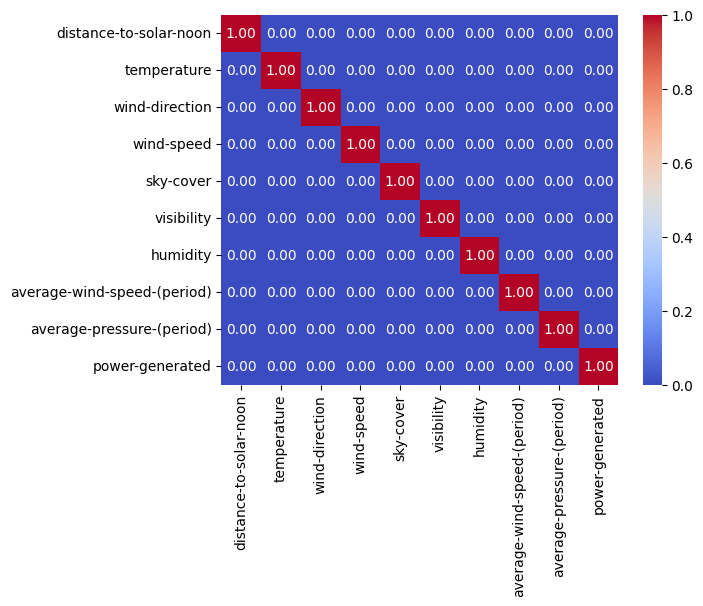

In [13]:
# Let's find correlation of all the columns

sns.heatmap(df.corr()>0.8, annot=True, cbar=True, cmap='coolwarm', fmt='.2f')
plt.show()

* We can see none of the columns seems to be highly correlated.
* It's a good thing so we can retain all the columns.

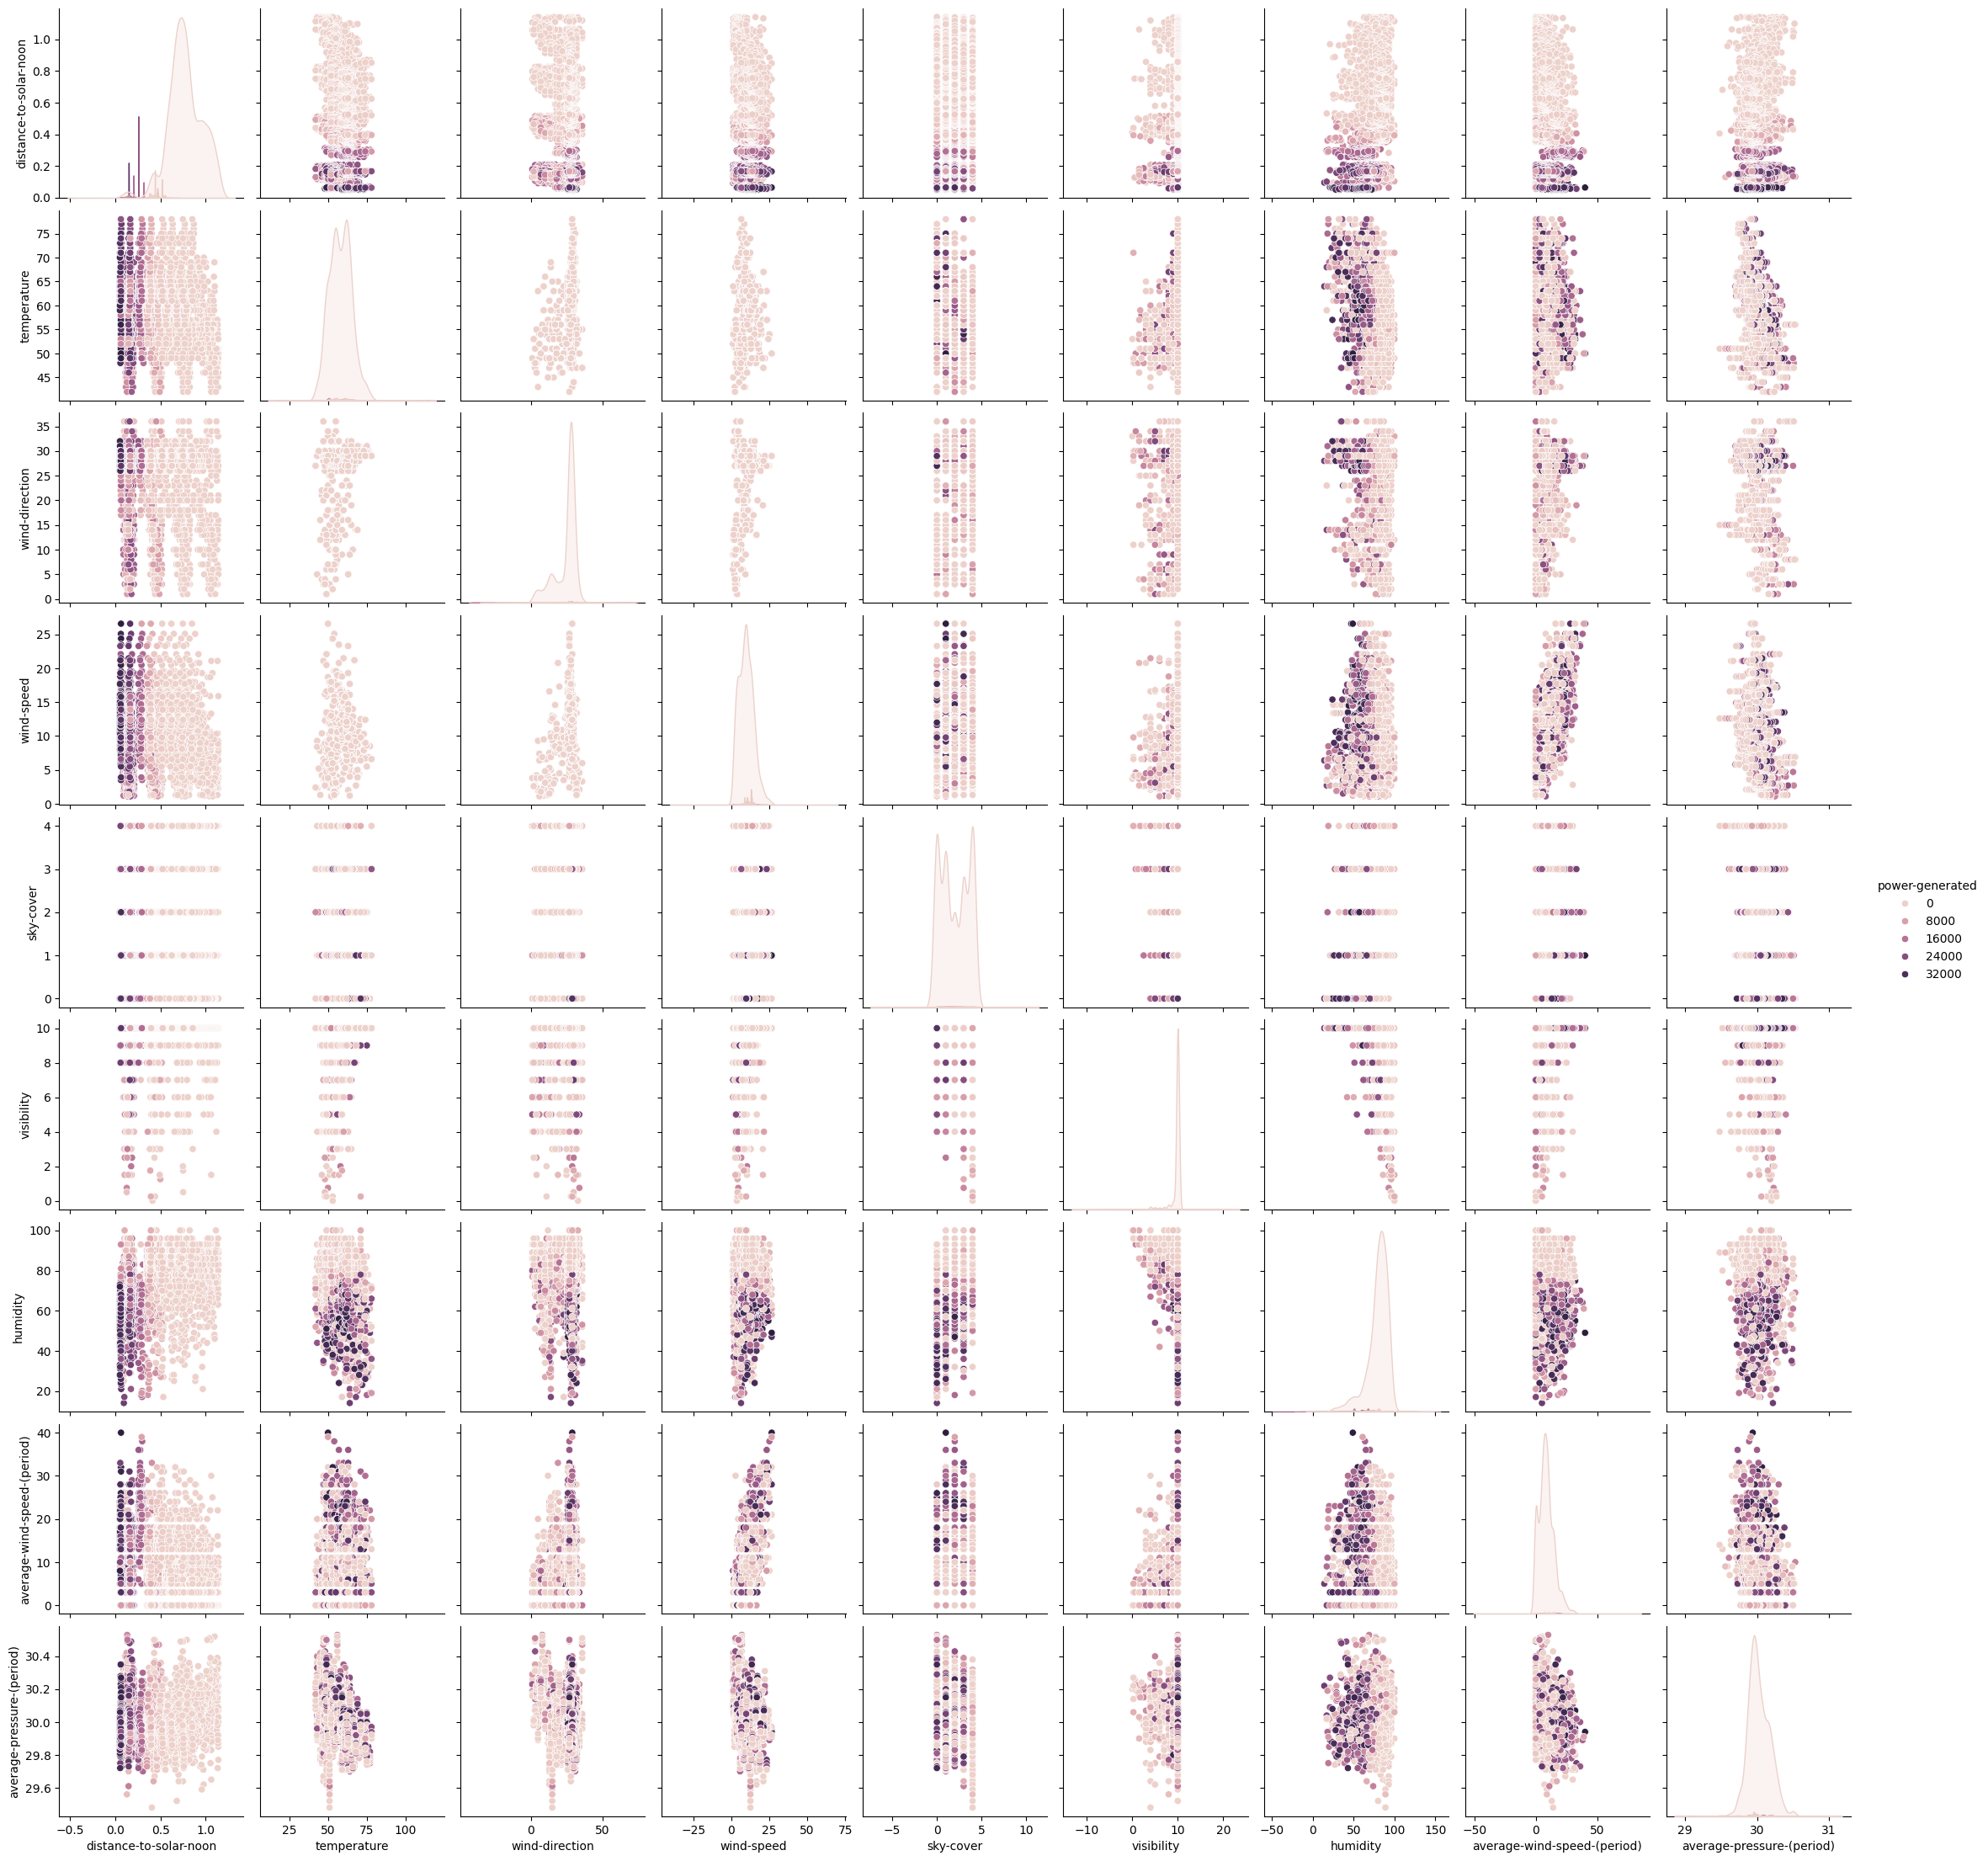

In [14]:
# Let's create and check pairplot for of the dataset for any possible hidden patters
sns.pairplot(df, hue='power-generated')
plt.show()

The above pairplot clearly shows there is possible relation between all the features and the target variable.

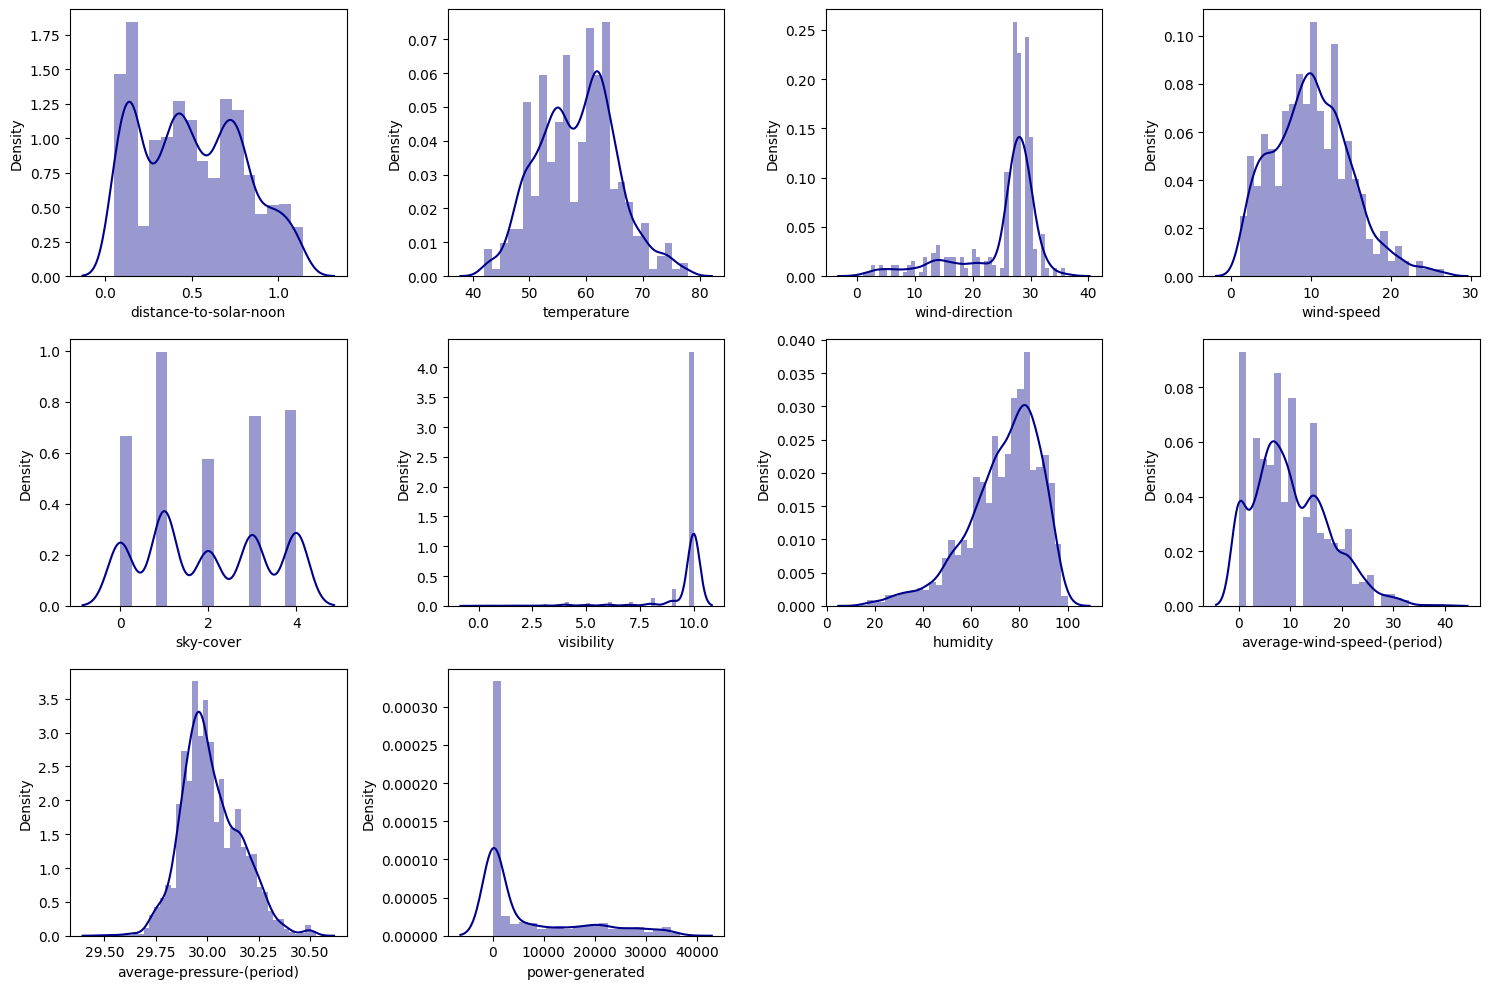

In [15]:
# Let's understand the distribution of our data in each column
plt.figure(figsize=(15,10))
index = 0
for col in df.columns:
    index += 1
    plt.subplot(3, 4, index)
    sns.distplot(df[col], color='darkblue')
    plt.tight_layout()
plt.show()

* Most of the columns are normally distributed but seems to be heavily tailed.
* Column [distance-to-solar-noon] appears to be 3 tailed, suggesting most of the observations are taken on those times.
* Columns like [wind-direction, visibility, humidity] appears to be right skewed and right single tailed, suggesting presence of outliers.
* Columns like [temperature, wind-speed, average-wind-speed-(period), average-pressure-speed-(period), power-generated] appears to be left skewed.
* We can also observe that power-generated column has a lot of instance at 0 meaning there are a lot of instances that do not generate power.
* We can also observe that visibility column has a very dominating presence of the instance 10, so we need to explore that column more.
* the column [average-pressure-(period)] appears ti have a very narrow margin from 29.5 to 30.5, it's more like a constant so we might consider removing it.

In [16]:
# !pip install plotly

* Apprantly wind direction does effect power-generation.
* We can observe most power is generated towards the end of the spectrum roughly translating to 28-32 range from the original range of wind-direction column.

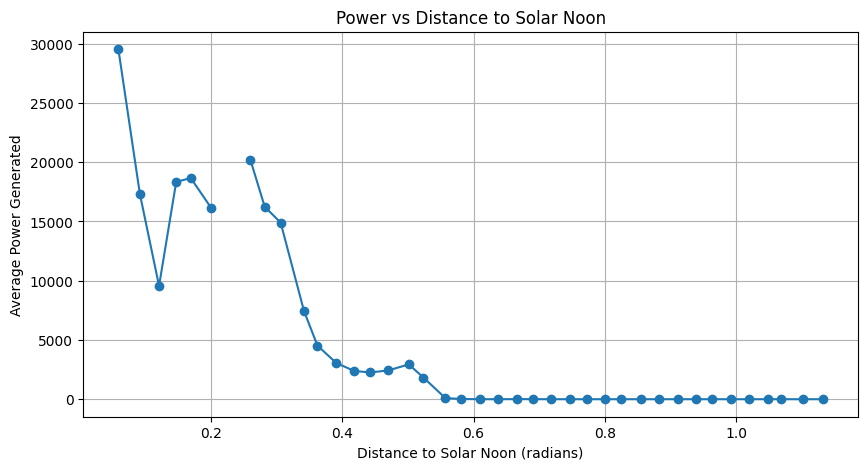

In [21]:
# Bin values to smooth the curve
df['binned_dist'] = pd.cut(df['distance-to-solar-noon'], bins=40)

# Calculate average power per bin
avg_power = df.groupby('binned_dist')['power-generated'].mean()
bin_centers = df.groupby('binned_dist')['distance-to-solar-noon'].mean()

plt.figure(figsize=(10, 5))
plt.plot(bin_centers, avg_power, marker='o')
plt.xlabel("Distance to Solar Noon (radians)")
plt.ylabel("Average Power Generated")
plt.title("Power vs Distance to Solar Noon")
plt.grid(True)
plt.show()


* Average Power generated is higher around 0(represents the highest position of sun) and decreases as we go on.
* Also we can see there is hardly any power generation after 0.6 in average.
* Average power-generation is observed around [0 - 0.4] which roughly times around 9am to 3pm.

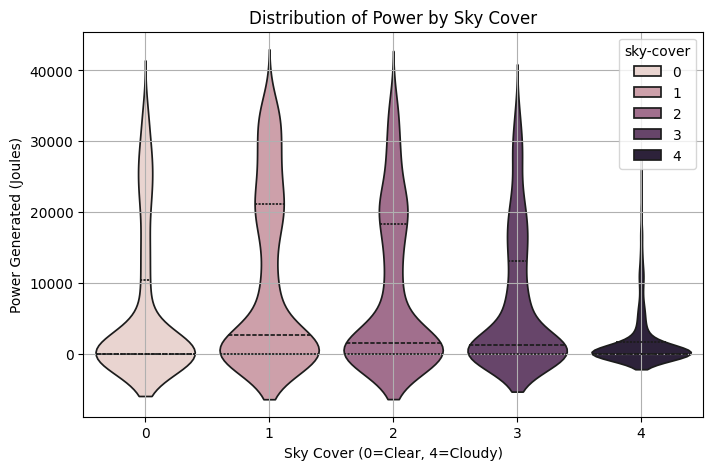

In [22]:
plt.figure(figsize=(8,5))
sns.violinplot(x='sky-cover', y='power-generated', data=df, inner='quartile', hue='sky-cover')
plt.title("Distribution of Power by Sky Cover")
plt.xlabel("Sky Cover (0=Clear, 4=Cloudy)")
plt.ylabel("Power Generated (Joules)")
plt.grid(True)
plt.show()


From this violinplot we can infer that:
* When the sky is clear the power-generation is higher.
* When the sky is coludy there is less power-generation.

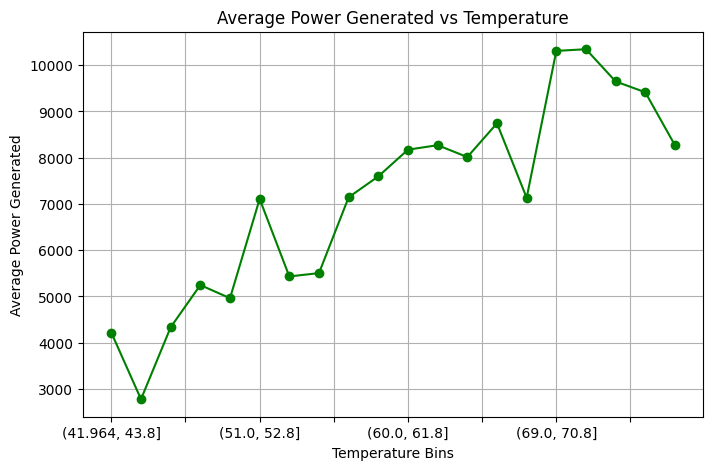

In [23]:
# Let's check how temperature effects the power generation
df['temp_bin'] = pd.cut(df['temperature'], bins=20)
avg_temp = df.groupby('temp_bin')['power-generated'].mean()

avg_temp.plot(kind='line', marker='o', figsize=(8,5), color='green')
plt.title("Average Power Generated vs Temperature")
plt.xlabel("Temperature Bins")
plt.ylabel("Average Power Generated")
plt.grid(True)
plt.show()


Based on this line plot we can infer that:
* More the temperature higher is the average power generation.
* Lesses the temperature lower is the average power generation.
* Highest average power generation is observed around 70C.

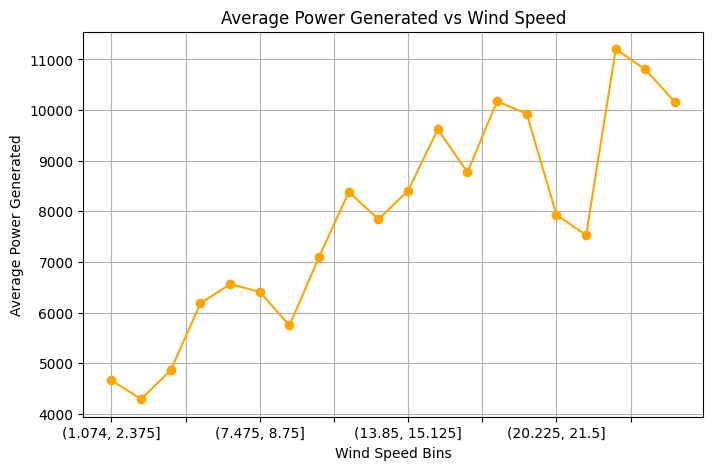

In [24]:
# Let's understand how wind speed effects power generation
df['wind_bin'] = pd.cut(df['wind-speed'], bins=20)
avg_wind = df.groupby('wind_bin')['power-generated'].mean()

avg_wind.plot(kind='line', marker='o', color='orange', figsize=(8,5))
plt.title("Average Power Generated vs Wind Speed")
plt.xlabel("Wind Speed Bins")
plt.ylabel("Average Power Generated")
plt.grid(True)
plt.show()


* Here in this plot also we can observe an upward trend suggesting as the wind speed increases there is an increase in the power-generation.
* We can also observe a sudden drop towards wind-speed of around 20, probably due to dust or any other factor.

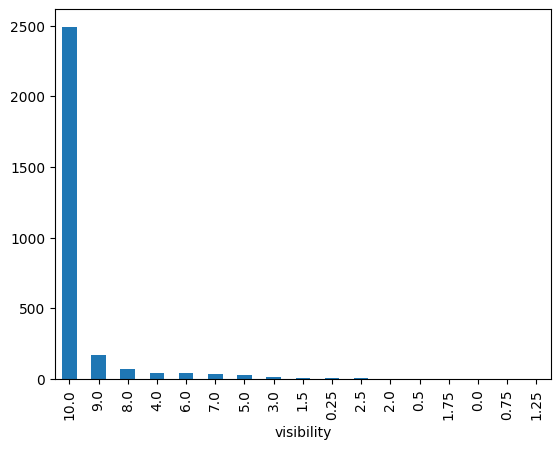

In [25]:
# Let's explore visibility column
df['visibility'].value_counts().plot(kind='bar')
plt.show()

* We can observe here that the visibility column has a lot of instances towards the number 10.
* We need more information about this column so we'll be checking the feature importance.

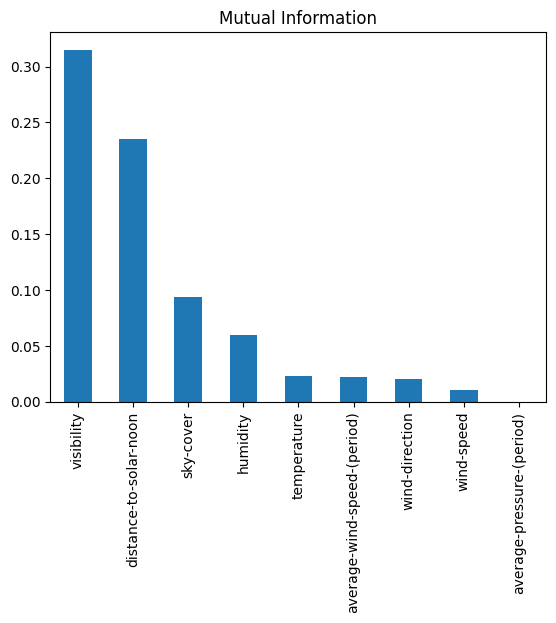

In [26]:
# Let's check feature importnace using mutual_info_classif
# mututal_info_classif = this method finds the non-linear and even subtle changes to the target variable
from sklearn.feature_selection import mutual_info_classif

features = df.drop(columns = ['power-generated', 'wind-dir-deg', 'binned_dist', 'temp_bin', 'wind_bin'], axis=1)
target=df['power-generated']

mi_scores = mutual_info_classif(features, target)
df_mic = pd.Series(mi_scores, index=features.columns).sort_values(ascending=False)
df_mic.plot(kind='bar', title='Mutual Information')
plt.show()

* We can see here the visibility feature is actually important, maybe the hidden data lies in the minority.
* So a better way to deal with it is to create bins and then later LabelEncode it treating it as categorical column.
* Another interesting observation we can grasp here is the column [aerage-pressure-(period)] is not that important as we can see in the above graph we also predicted this from density plot, so we will avoid using this for model training.

#Feature Engineering

In [27]:
# Visibility column

def bin_visibility(v):
    if v >= 9.0:
        return 'Very Clear'
    elif v >= 6.0:
        return 'Clear'
    elif v >= 3.0:
        return 'Moderate'
    elif v > 0.0:
        return 'Low Visibility'
    else:
        return 'No Visibility'

df['visibility_bin'] = df['visibility'].apply(bin_visibility)

In [28]:
df['visibility_bin'].value_counts()

visibility_bin
Very Clear        2660
Clear              151
Moderate            86
Low Visibility      22
No Visibility        1
Name: count, dtype: int64

* This will prevent us from removing the column unnecessarily, and hopefully retain the important data it holds for training.

In [29]:
# df['humidity'].value_counts()

In [30]:
#Humidity column
def humidity_bin(h):
    if h < 40:
        return 'Dry'
    elif h < 70:
        return 'Moderate'
    else:
        return 'Humid'

df['humidity_level'] = df['humidity'].apply(humidity_bin)

In [31]:
# Wind-direction, transforming wind-direction to cylindrical feature
# 0-32
df['wind_dir_sin'] = np.sin(2 * np.pi * df['wind-direction'] / 360)
df['wind_dir_cos'] = np.cos(2 * np.pi * df['wind-direction'] / 360)

This way our model will have a better undrstanding of wind-direction and will not treat them like 0 and 360 degrees are far away from each other.

In [32]:
df['solar_period'] = df['distance-to-solar-noon'].apply(lambda x: 'Morning' if x < 0.5 else 'Evening')
df['solar_period'].value_counts()

solar_period
Morning    1521
Evening    1399
Name: count, dtype: int64

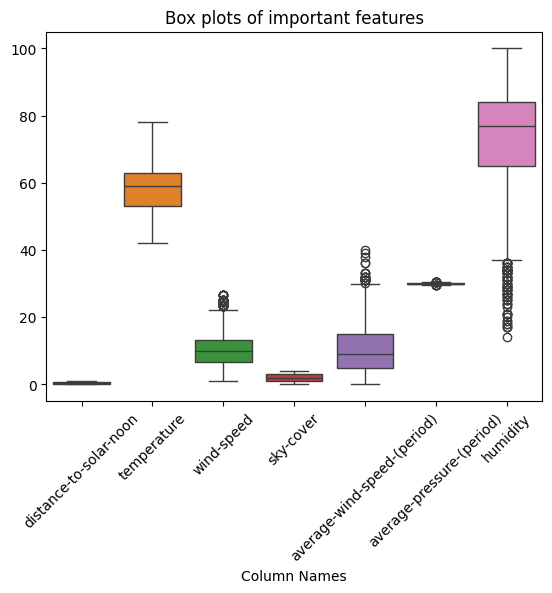

In [33]:
# Box plots to check outliers of important features
# Selecting imporant features to check their outliers
imp_features = ['distance-to-solar-noon', 'temperature', 'wind-speed', 'sky-cover', 'average-wind-speed-(period)', 'average-pressure-(period)', 'humidity']

sns.boxplot(df[imp_features])
plt.title("Box plots of important features")
plt.xticks(rotation=45)
plt.xlabel("Column Names")
plt.show()

In [34]:
# Let's detect number of outliers the above imp_features

# Function to identify outliers using the IQR method
def detect_outliers(column):                                                   #function definition takes columns as input
    Q1 = df[column].quantile(0.25)                                             # defining 25% of the column values
    Q3 = df[column].quantile(0.75)                                             # defiining 75% of the column values
    IQR = Q3 - Q1                                                              # Defining Inter Quartile Range
    lower_bound = Q1 - 1.5 * IQR                                               # Finding lower bound
    upper_bound = Q3 + 1.5 * IQR                                               # Finding upper bound
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]     # identifying outlier i.e data points below lower_bound and data points above upper_bound
    return outliers                                                            # return those points only

# Check for outliers in each column and summarize
outlier_summary = {}                                      # dictionary to hold the number of outlier in each column
for column in imp_features:                               # running the loop through all the columns in DataFrame
    outliers = detect_outliers(column)                    # Calling the function
    outlier_summary[column] = len(outliers)               # updating dictionary

# Display the outlier counts for each column
print("Total Number of outliers: ",sum(outlier_summary.values()),"\n")
outlier_summary

Total Number of outliers:  180 



{'distance-to-solar-noon': 0,
 'temperature': 0,
 'wind-speed': 40,
 'sky-cover': 0,
 'average-wind-speed-(period)': 26,
 'average-pressure-(period)': 31,
 'humidity': 83}

In [35]:
cols = ['distance-to-solar-noon', 'temperature', 'wind-speed', 'sky-cover', 'average-wind-speed-(period)', 'average-pressure-(period)', 'humidity']
outlier_removal_features = pd.Index(cols)
outlier_removal_features

def remove_outliers(df, columns):
    df_filtered = df.copy()
    mask = pd.Series([True] * len(df_filtered), index=df_filtered.index)

    for col in columns:
        Q1 = df_filtered[col].quantile(0.25)
        Q3 = df_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Combine with existing mask
        mask &= df_filtered[col].between(lower_bound, upper_bound)

    return df_filtered[mask]

print("Dataset size before removing outliers:", df.shape)
df = remove_outliers(df, outlier_removal_features)
print("Dataset size after removing outliers:", df.shape)

Dataset size before removing outliers: (2920, 19)
Dataset size after removing outliers: (2755, 19)


In [36]:
# # Treating outliers using Capping method
# def outlier_capping(df,column):
#     Q1=df[column].quantile(0.25)
#     Q3=df[column].quantile(0.75)
#     IQR=Q3-Q1
#     lower_bound=Q1-1.5*IQR
#     upper_bound=Q3+1.5*IQR
#     df[column]=df[column].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)

# for col in imp_features:
#     outlier_capping(df,col)

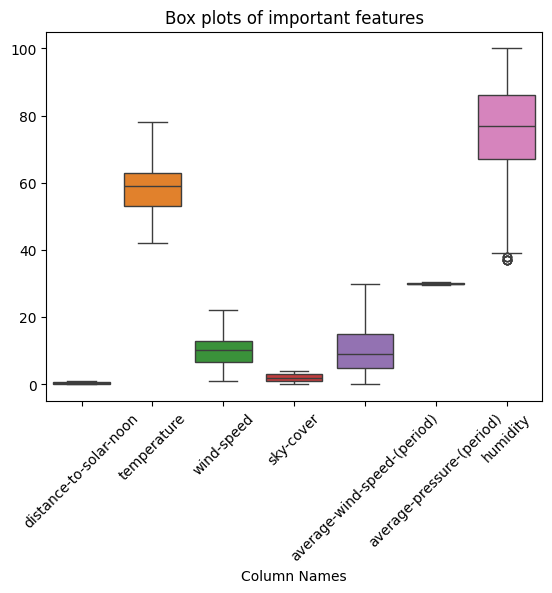

In [37]:
# Ensuring there is no outliers anymore

sns.boxplot(df[imp_features])
plt.title("Box plots of important features")
plt.xticks(rotation=45)
plt.xlabel("Column Names")
plt.show()

In [38]:
#Let's use the LabelEncoder for newly created categorical column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['visibility_bin', 'humidity_level', 'solar_period']:
    df[col] = le.fit_transform(df[col])
    print(f"{col} Column has transformed succesfully, it's classes are {le.classes_}")

visibility_bin Column has transformed succesfully, it's classes are ['Clear' 'Low Visibility' 'Moderate' 'No Visibility' 'Very Clear']
humidity_level Column has transformed succesfully, it's classes are ['Dry' 'Humid' 'Moderate']
solar_period Column has transformed succesfully, it's classes are ['Evening' 'Morning']


In [39]:
# sns.heatmap(df.corr(numeric_only=True)>0.8,annot=True)

# Feature Selection

In [40]:
# Feature Selection: Let's select the most important features for model training
x = df.drop(['wind-direction','visibility', 'power-generated', 'wind-dir-deg', 'binned_dist', 'temp_bin', 'wind_bin','visibility_bin','humidity_level','solar_period'], axis=1)
y = df['power-generated']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=29)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2204, 9), (551, 9), (2204,), (551,))

<Axes: >

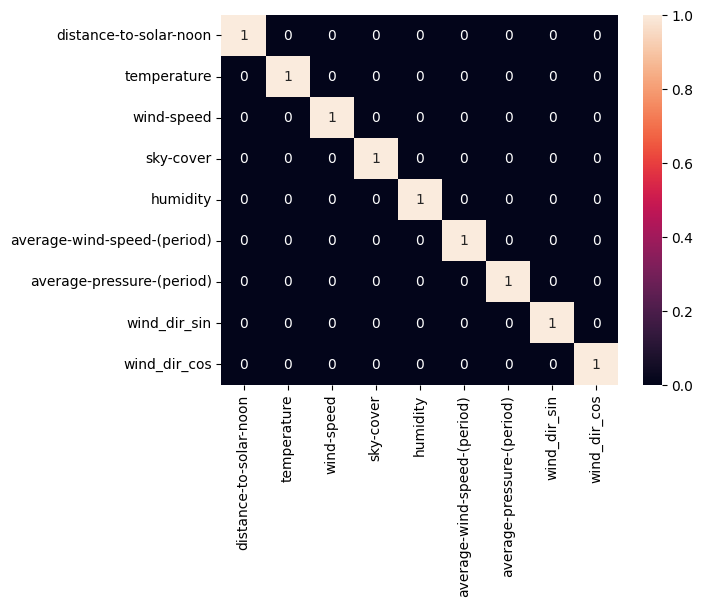

In [41]:
sns.heatmap(x.corr()>0.8, annot=True)

In [42]:
# Scaling the features using MinMaxScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# Model building

In [43]:
# !pip install catboost

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

#Linear Models

In [46]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
y_pred_lr = lr.predict(x_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}, MAE: {mae_lr}")

Linear Regression - MSE: 34123235.960890494, R2: 0.6726548065411401, MAE: 4718.543989354929


In [47]:
lassso = Lasso()
lassso.fit(x_train_scaled, y_train)
y_pred_lasso = lassso.predict(x_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f"Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}, MAE: {mae_lasso}")

Lasso Regression - MSE: 34124975.235988334, R2: 0.6726381216246207, MAE: 4718.2474978702385


In [48]:
ridge=Ridge()
ridge.fit(x_train_scaled, y_train)
y_pred_ridge = ridge.predict(x_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}, MAE: {mae_ridge}")

Ridge Regression - MSE: 34124546.024836466, R2: 0.6726422390596641, MAE: 4718.207786150314


In [49]:
elastic=ElasticNet()
elastic.fit(x_train_scaled, y_train)
y_pred_elastic = elastic.predict(x_test_scaled)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
print(f"ElasticNet Regression - MSE: {mse_elastic}, R2: {r2_elastic}, MAE: {mae_elastic}")

ElasticNet Regression - MSE: 39721779.73353379, R2: 0.6189478135571138, MAE: 4893.643380649937


In [50]:
svr = SVR()
svr.fit(x_train_scaled, y_train)
y_pred_svr = svr.predict(x_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print(f"SVR - MSE: {mse_svr}, R2: {r2_svr}, MAE: {mae_svr}")

SVR - MSE: 138962452.26561907, R2: -0.3330708398389417, MAE: 6335.139895657309


#Tree Based Models

In [51]:
tree=DecisionTreeRegressor()
tree.fit(x_train_scaled, y_train)
y_pred_tree = tree.predict(x_test_scaled)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print(f"Decision Tree Regression - MSE: {mse_tree}, R2: {r2_tree}, MAE: {mae_tree}")

Decision Tree Regression - MSE: 22825185.399274047, R2: 0.7810373336566547, MAE: 2262.266787658802


In [52]:
rf = RandomForestRegressor()
rf.fit(x_train_scaled, y_train)

y_pred_rf = rf.predict(x_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"RandomForestRegressor - MSE: {mse_rf}, R2: {r2_rf}, MAE: {mae_rf}")

RandomForestRegressor - MSE: 13038965.713603448, R2: 0.8749168232779885, MAE: 1860.5051361161527


In [53]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train_scaled, y_train)
y_pred_gbr = gbr.predict(x_test_scaled)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print(f"GradientBoostingRegressor - MSE: {mse_gbr}, R2: {r2_gbr}, MAE: {mae_gbr}")

GradientBoostingRegressor - MSE: 11005568.789671818, R2: 0.8944232590159689, MAE: 1797.6808597131453


In [54]:
xgb = XGBRegressor()
xgb.fit(x_train_scaled, y_train)
y_pred_xgb = xgb.predict(x_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBRegressor - MSE: {mse_xgb}, R2: {r2_xgb}, MAE: {mae_xgb}")

XGBRegressor - MSE: 14956790.04688842, R2: 0.8565190434455872, MAE: 2092.337826958369


In [55]:
knn = KNeighborsRegressor()
knn.fit(x_train_scaled, y_train)
y_pred_knn = knn.predict(x_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f"KNeighborsRegressor - MSE: {mse_knn}, R2: {r2_knn}, MAE: {mae_knn}")

KNeighborsRegressor - MSE: 17268226.133647915, R2: 0.8343454052573154, MAE: 2327.459528130671


In [56]:
lgbm = LGBMRegressor()
lgbm.fit(x_train_scaled, y_train)

y_pred_lgbm = lgbm.predict(x_test_scaled)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
print(f"LGBMRegressor - MSE: {mse_lgbm}, R2: {r2_lgbm}, MAE: {mae_lgbm}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 2204, number of used features: 9
[LightGBM] [Info] Start training from score 6830.064882
LGBMRegressor - MSE: 10946736.330902915, R2: 0.8949876405013426, MAE: 1769.9808130776019


In [57]:
bgr = BaggingRegressor()
bgr.fit(x_train_scaled, y_train)
y_pred_bgr = bgr.predict(x_test_scaled)
mse_bgr = mean_squared_error(y_test, y_pred_bgr)
r2_bgr = r2_score(y_test, y_pred_bgr)
mae_bgr = mean_absolute_error(y_test, y_pred_bgr)
print(f"BaggingRegressor - MSE: {mse_bgr}, R2: {r2_bgr}, MAE: {mae_bgr}")

BaggingRegressor - MSE: 12673220.827967335, R2: 0.878425424586562, MAE: 1813.3613430127043


#Hyper-parameter Tuning

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor
import numpy as np

param_dist = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

lgbm = LGBMRegressor()

random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=50,  # You can increase this for more exhaustive search
    cv=5,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train_scaled, y_train)
print("Best Parameters:\n", random_search.best_params_)
print("Best R2 Score: ", random_search.best_score_)

best_model = random_search.best_estimator_

y_pred_best = best_model.predict(x_test_scaled)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Test R2:", r2_score(y_test, y_pred_best))
print("Test MSE:", mean_squared_error(y_test, y_pred_best))
print("Test MAE:", mean_absolute_error(y_test, y_pred_best))
print("Training Model Score: ", best_model.score(x_train_scaled, y_train))
print("Testing Model Score: ", best_model.score(x_test_scaled, y_test))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 2204, number of used features: 9
[LightGBM] [Info] Start training from score 6830.064882
Best Parameters:
 {'subsample': 0.6, 'num_leaves': 31, 'n_estimators': 200, 'min_child_samples': 5, 'max_depth': 30, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best R2 Score:  0.9089524212072642
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Test R2

In [59]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'min_child_samples': [10, 20],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

lgbm = LGBMRegressor()

grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(x_train_scaled, y_train)

print("Best Parameters:\n", grid_search.best_params_)
print("Best R2 Score on Train CV: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(x_test_scaled)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Test R2:", r2_score(y_test, y_pred_best))
print("Test MSE:", mean_squared_error(y_test, y_pred_best))
print("Test MAE:", mean_absolute_error(y_test, y_pred_best))
print("Training Model Score: ", best_model.score(x_train_scaled, y_train))
print("Testing Model Score: ", best_model.score(x_test_scaled, y_test))

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 2204, number of used features: 9
[LightGBM] [Info] Start training from score 6830.064882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [60]:
from sklearn.metrics import root_mean_squared_error

rf = RandomForestRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100],
    'max_depth': [15],
    'min_samples_split': [1,2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,5,6,7,8,9,10]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit the model
grid_search.fit(x_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score on Training Data:", grid_search.best_score_)

# Evaluate on test data
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test_scaled)

print("Test R² Score:", r2_score(y_test, y_pred))
print("Test MSE:", root_mean_squared_error(y_test, y_pred))
print("Test RMSE:", mean_squared_error(y_test, y_pred))


Fitting 5 folds for each of 1710 candidates, totalling 8550 fits
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 80}
Best R² Score on Training Data: 0.9087024029584434
Test R² Score: 0.8828980438326196
Test MSE: 3493.849515375644
Test RMSE: 12206984.436090622


In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
!pip install optuna
import optuna
from lightgbm import LGBMRegressor
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from xgboost import XGBRegressor

# Time-aware split
split_idx = int(0.8 * len(df))
X_train, X_test = x.iloc[:split_idx], x.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Preprocessing
numeric_features = x.select_dtypes(include=['float64', 'int64']).columns
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features)
])

# Optuna objective
def objective(trial):
    # params = {
    #     'n_estimators': trial.suggest_int('n_estimators', 300, 1200),
    #     'max_depth': trial.suggest_int('max_depth', 4, 10),
    #     'learning_rate': trial.suggest_float('learning_rate', 0.02, 0.1),
    #     'subsample': trial.suggest_float('subsample', 0.7, 1.0),
    #     'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
    #     'reg_alpha': trial.suggest_float('reg_alpha', 1e-4, 5.0),
    #     'reg_lambda': trial.suggest_float('reg_lambda', 1e-4, 5.0),
    #     'num_leaves': trial.suggest_int('num_leaves', 20, 50),
    #     'min_child_samples': trial.suggest_int('min_child_samples', 5, 50)
    # }
    params = {
    "n_estimators": trial.suggest_int("n_estimators", 500, 2000),
    "max_depth": trial.suggest_int("max_depth", 4, 12),
    "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.05, log=True),
    "subsample": trial.suggest_float("subsample", 0.6, 1.0),
    "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
    "reg_alpha": trial.suggest_float("reg_alpha", 1e-3, 10.0, log=True),
    "reg_lambda": trial.suggest_float("reg_lambda", 1e-3, 10.0, log=True),
    "gamma": trial.suggest_float("gamma", 0, 5.0),
    "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
    "tree_method": "hist",  # fast histogram-based algorithm
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "verbosity": 0,
    "random_state": 42
}



    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(**params))
    ])

    tscv = TimeSeriesSplit(n_splits=5)
    scores = []

    for train_idx, val_idx in tscv.split(X_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        model.fit(X_tr, y_tr)
        preds = model.predict(X_val)
        scores.append(r2_score(y_val, preds))

    return np.mean(scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Final model training
best_params = study.best_params
final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(**best_params, random_state=42))
])
final_model.fit(X_train, y_train)


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[I 2025-07-11 21:53:34,513] A new study created in memory with name: no-name-19f2aa16-16e2-4ca8-b668-287d5b7ce36d
[I 2025-07-11 21:53:49,248] Trial 0 finished with value: 0.7853883504867554 and parameters: {'n_estimators': 1977, 'max_depth': 8, 'learning_rate': 0.04752412136286978, 'subsample': 0.923631993990125, 'colsample_bytree': 0.6734022322420894, 'reg_alpha': 3.7741782314667747, 'reg_lambda': 0.003696895702371042, 'gamma': 0.2304057549245364, 'min_child_weight': 4}. Best is trial 0 with value: 0.7853883504867554.
[I 2025-07-11 21:54:00,282] Trial 1 finished with value: 0.805849301815033 and parameters: {'n_estimators': 1804, 'max_depth': 7, 'learning_rate': 0.008104554165972791, 'subsample': 0.6083668884306725, 'colsample_bytree': 0.6214930862458858, 'reg_alpha': 5.71873729359484, 'reg_lambda': 0.005260039791730126, 'gamma': 2.4161029051422016, 'min_child_w

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['distance-to-solar-noon', 'temperature', 'wind-speed', 'sky-cover',
       'humidity', 'average-wind-speed-(period)', 'average-pressure-(period)',
       'wind_dir_sin', 'wind_dir_cos'],
      dtype='object'))])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              c...
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.0061973437562768, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=4, max_leaves=None,
                              min_child_weight=3, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1233, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [65]:
# Train and evaluate
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print(f"🎯 R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"📉 MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"📉 RMSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"📉 Model Score Train: {final_model.score(X_train, y_train):.2f}")
print(f"📉 Model Score Test: {final_model.score(X_test, y_test):.2f}")


# Feature importances
importances = final_model.named_steps['regressor'].feature_importances_
features = x.columns
importance_df = pd.DataFrame({'feature': features, 'importance': importances})
print("\n🔝 Top Features:\n", importance_df.sort_values('importance', ascending=False))

🎯 R² Score: 0.9229
📉 MAE: 1615.14
📉 RMSE: 11213912.77
📉 Model Score Train: 0.95
📉 Model Score Test: 0.92

🔝 Top Features:
                        feature  importance
0       distance-to-solar-noon    0.469864
3                    sky-cover    0.177040
4                     humidity    0.130720
7                 wind_dir_sin    0.065409
8                 wind_dir_cos    0.046218
2                   wind-speed    0.036295
5  average-wind-speed-(period)    0.031547
1                  temperature    0.022938
6    average-pressure-(period)    0.019969


---

### 📊 Model Performance Comparison

| Model                            | MSE             | R² Score | MAE      |
|----------------------------------|------------------|----------|----------|
| **Linear Regression**            | 35,077,473.52    | 0.6538   | 4801.36  |
| **Lasso Regression**             | 35,078,448.82    | 0.6538   | 4801.19  |
| **Ridge Regression**             | 35,077,261.45    | 0.6538   | 4801.05  |
| **ElasticNet Regression**        | 39,253,009.85    | 0.6126   | 4892.23  |
| **SVR**                          | 137,705,087.98   | -0.3591  | 6426.13  |
| **Decision Tree Regressor**      | 16,812,389.76    | 0.8341   | 1795.13  |
| **KNeighbors Regressor**         | 15,849,139.48    | 0.8436   | 2257.99  |
| **Random Forest Regressor**      | 8,910,949.72     | 0.9120   | 1516.04  |
| **Gradient Boosting Regressor**  | 8,487,659.02     | 0.9162   | 1619.51  |
| **XGBoost Regressor**            | 10,980,096.00    | 0.8916   | 1775.51  |
| **LightGBM Regressor**           | 9,200,628.82     | 0.9092   | 1584.00  |
| **Bagging Regressor**            | 10,803,895.56    | 0.8934   | 1623.56  |

---

### 🔧 Tuned Models

| Tuned Model                      | Test MSE        | Test R² Score | MAE     | Train Score | Notes |
|----------------------------------|------------------|----------------|----------|--------------|--------|
| **LGBMR (RandomizedSearchCV)**   | 9,451,515.60     | 0.9067         | 1713.09 | 0.9961       |        |
| **LGBMR (GridSearchCV)**         | 8,811,115.64     | 0.9130         | 1530.87 | 0.9672       |        |
| **RandomForest (GridSearchCV)**  | 8,875,283.86     | 0.9124         | 1673.2     | 0.9127       |            |
| **XGBR (Optuna Tuned)**          | 11,457,953.00    | 0.9212         | 1566.41 | 0.97         | Best R² |

---


In [67]:
import joblib

joblib.dump(final_model, 'Model.pkl')

['Model.pkl']

In [68]:
model = joblib.load('Model.pkl')
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['distance-to-solar-noon', 'temperature', 'wind-speed', 'sky-cover',
       'humidity', 'average-wind-speed-(period)', 'average-pressure-(period)',
       'wind_dir_sin', 'wind_dir_cos'],
      dtype='object'))])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              c...
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.0061973437562768, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=4, max_leaves=None,
                              min_child_weight=3, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1233, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [71]:
import joblib
model_1 = joblib.load('Model.pkl')
y_pred = model_1.predict(X_test)

print(f"🎯 R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"📉 MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"📉 RMSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"📉 Model Score Train: {model_1.score(x_train, y_train):.2f}")
print(f"📉 Model Score Test: {model_1.score(x_test, y_test):.2f}")


# Feature importances
importances = model.named_steps['regressor'].feature_importances_
features = x.columns
importance_df = pd.DataFrame({'feature': features, 'importance': importances})
print("\n🔝 Top Features:\n", importance_df.sort_values('importance', ascending=False))

🎯 R² Score: 0.9229
📉 MAE: 1615.14
📉 RMSE: 11213912.77
📉 Model Score Train: -1.12
📉 Model Score Test: -0.65

🔝 Top Features:
                        feature  importance
0       distance-to-solar-noon    0.469864
3                    sky-cover    0.177040
4                     humidity    0.130720
7                 wind_dir_sin    0.065409
8                 wind_dir_cos    0.046218
2                   wind-speed    0.036295
5  average-wind-speed-(period)    0.031547
1                  temperature    0.022938
6    average-pressure-(period)    0.019969


In [72]:
x_train.head()

,distance-to-solar-noon,temperature,wind-speed,sky-cover,humidity,average-wind-speed-(period),average-pressure-(period),wind_dir_sin,wind_dir_cos
2406,0.459368,70,11.6,1,70,15.0,29.78,0.500000,0.866025
1996,0.064209,61,15.3,0,54,23.0,30.01,0.469472,0.882948
8,0.862113,72,6.8,0,67,6.0,29.86,0.484810,0.874620
1565,0.308229,55,8.2,4,75,13.0,30.11,0.309017,0.951057
802,0.421875,51,4.0,0,80,10.0,30.36,0.207912,0.978148


In [73]:
y_train.head()

0       0
1       0
2    5418
7       0
8       0
Name: power-generated, dtype: int64

In [74]:
for col in x.columns:
    print(col)
    print(x[col].min())
    print(x[col].max())
    print()

distance-to-solar-noon
0.050516648
1.141361257

temperature
42
78

wind-speed
1.1
22.1

sky-cover
0
4

humidity
37
100

average-wind-speed-(period)
0.0
30.0

average-pressure-(period)
29.64
30.39

wind_dir_sin
0.01745240643728351
0.5877852522924731

wind_dir_cos
0.8090169943749475
0.9998476951563913



In [76]:
import joblib
import numpy as np
import pandas as pd

# Load the saved pipeline
model = joblib.load("Model.pkl")

# Define input as a dict with correct column names
# 0.628535	69	7.5	0	77	5.0	29.85	0.469472	0.882948
input_dict = {
    'distance-to-solar-noon': [0.169297],
    'temperature': [65],
    'wind-speed': [11.1],
    'sky-cover': [3],
    'humidity': [57],
    'average-wind-speed-(period)': [7.0],
    'average-pressure-(period)': [30.01],
    'wind_dir_sin': [0.469472],
    'wind_dir_cos': [0.882948]
}

# Convert to DataFrame
input_df = pd.DataFrame(input_dict)

# Predict
power = model.predict(input_df)[0]
# power = predicted_power[0]

print(f"Predicted Power: {power:.2f} kW")

efficiency = (power/33500) * 100
print(f'Estimated Efficiency: {efficiency:.1f}%')

if power < 11000:
    level = 'Low'
elif power >11000 and power<22000:
    level = 'Mid'
else:
    level = 'High'

print(f'Estimated Efficiency level: {level}')

Predicted Power: 20658.07 kW
Estimated Efficiency: 61.7%
Estimated Efficiency level: Mid


Thank you for going through my work till the end, feel free to get in touch if you have any questions... :)